**Run the two cells below before you begin. These will set the notebook to autosave every 10 seconds, import the necessary libraries for this challenge, and set figure appearance.**

In [1]:
%autosave 10

Autosaving every 10 seconds


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

mpl.rcParams['figure.dpi'] = 400
mpl.rcParams['font.size'] = 4

**To begin, import data set `cleaned_data.csv` and create lists of feature names for the remaining financial features: `'BILL_AMT1'`, `'BILL_AMT2'`, `'BILL_AMT3'`, `'BILL_AMT4'`, `'BILL_AMT5'`, `'BILL_AMT6'`,  `'PAY_AMT1'`, `'PAY_AMT2'`, `'PAY_AMT3'`, `'PAY_AMT4'`, `'PAY_AMT5'`, and `'PAY_AMT6'`.**

**Name the features `bill_feats` and `pay_amt_feats`, respectively.**

In [4]:
# Import the dataset
data=pd.read_csv("cleaned_data.csv")

In [16]:
# Create lists `bill_feats` and `pay_amt_feats`
bill_feats=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_amt_feats=['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

____________________________________________________________________________________
**Next, use `.describe()` to examine statistical summaries of the bill amount features**


In [17]:
data[bill_feats].describe()


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000
mean,50805.530375,48724.387116,46477.272360,42832.880537,39867.158790,38435.803996
std,73410.538675,70717.795900,68489.634181,64068.282338,60505.864984,59232.062399
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3230.000000,2658.500000,2381.500000,2008.500000,1496.000000,1052.000000
50%,21523.000000,20523.000000,19701.000000,18703.000000,17741.000000,16560.000000
75%,66636.000000,63350.500000,59628.500000,53678.000000,49788.000000,48804.000000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


Reflect on what you see. Does it make sense?

___________________________________________________________________________________
**Then you should visualize the bill amount features using a 2 by 3 grid of histogram plots.**
> Hint: You can use 20 bins for this visualization.

Text(0, 0.5, 'Hist')

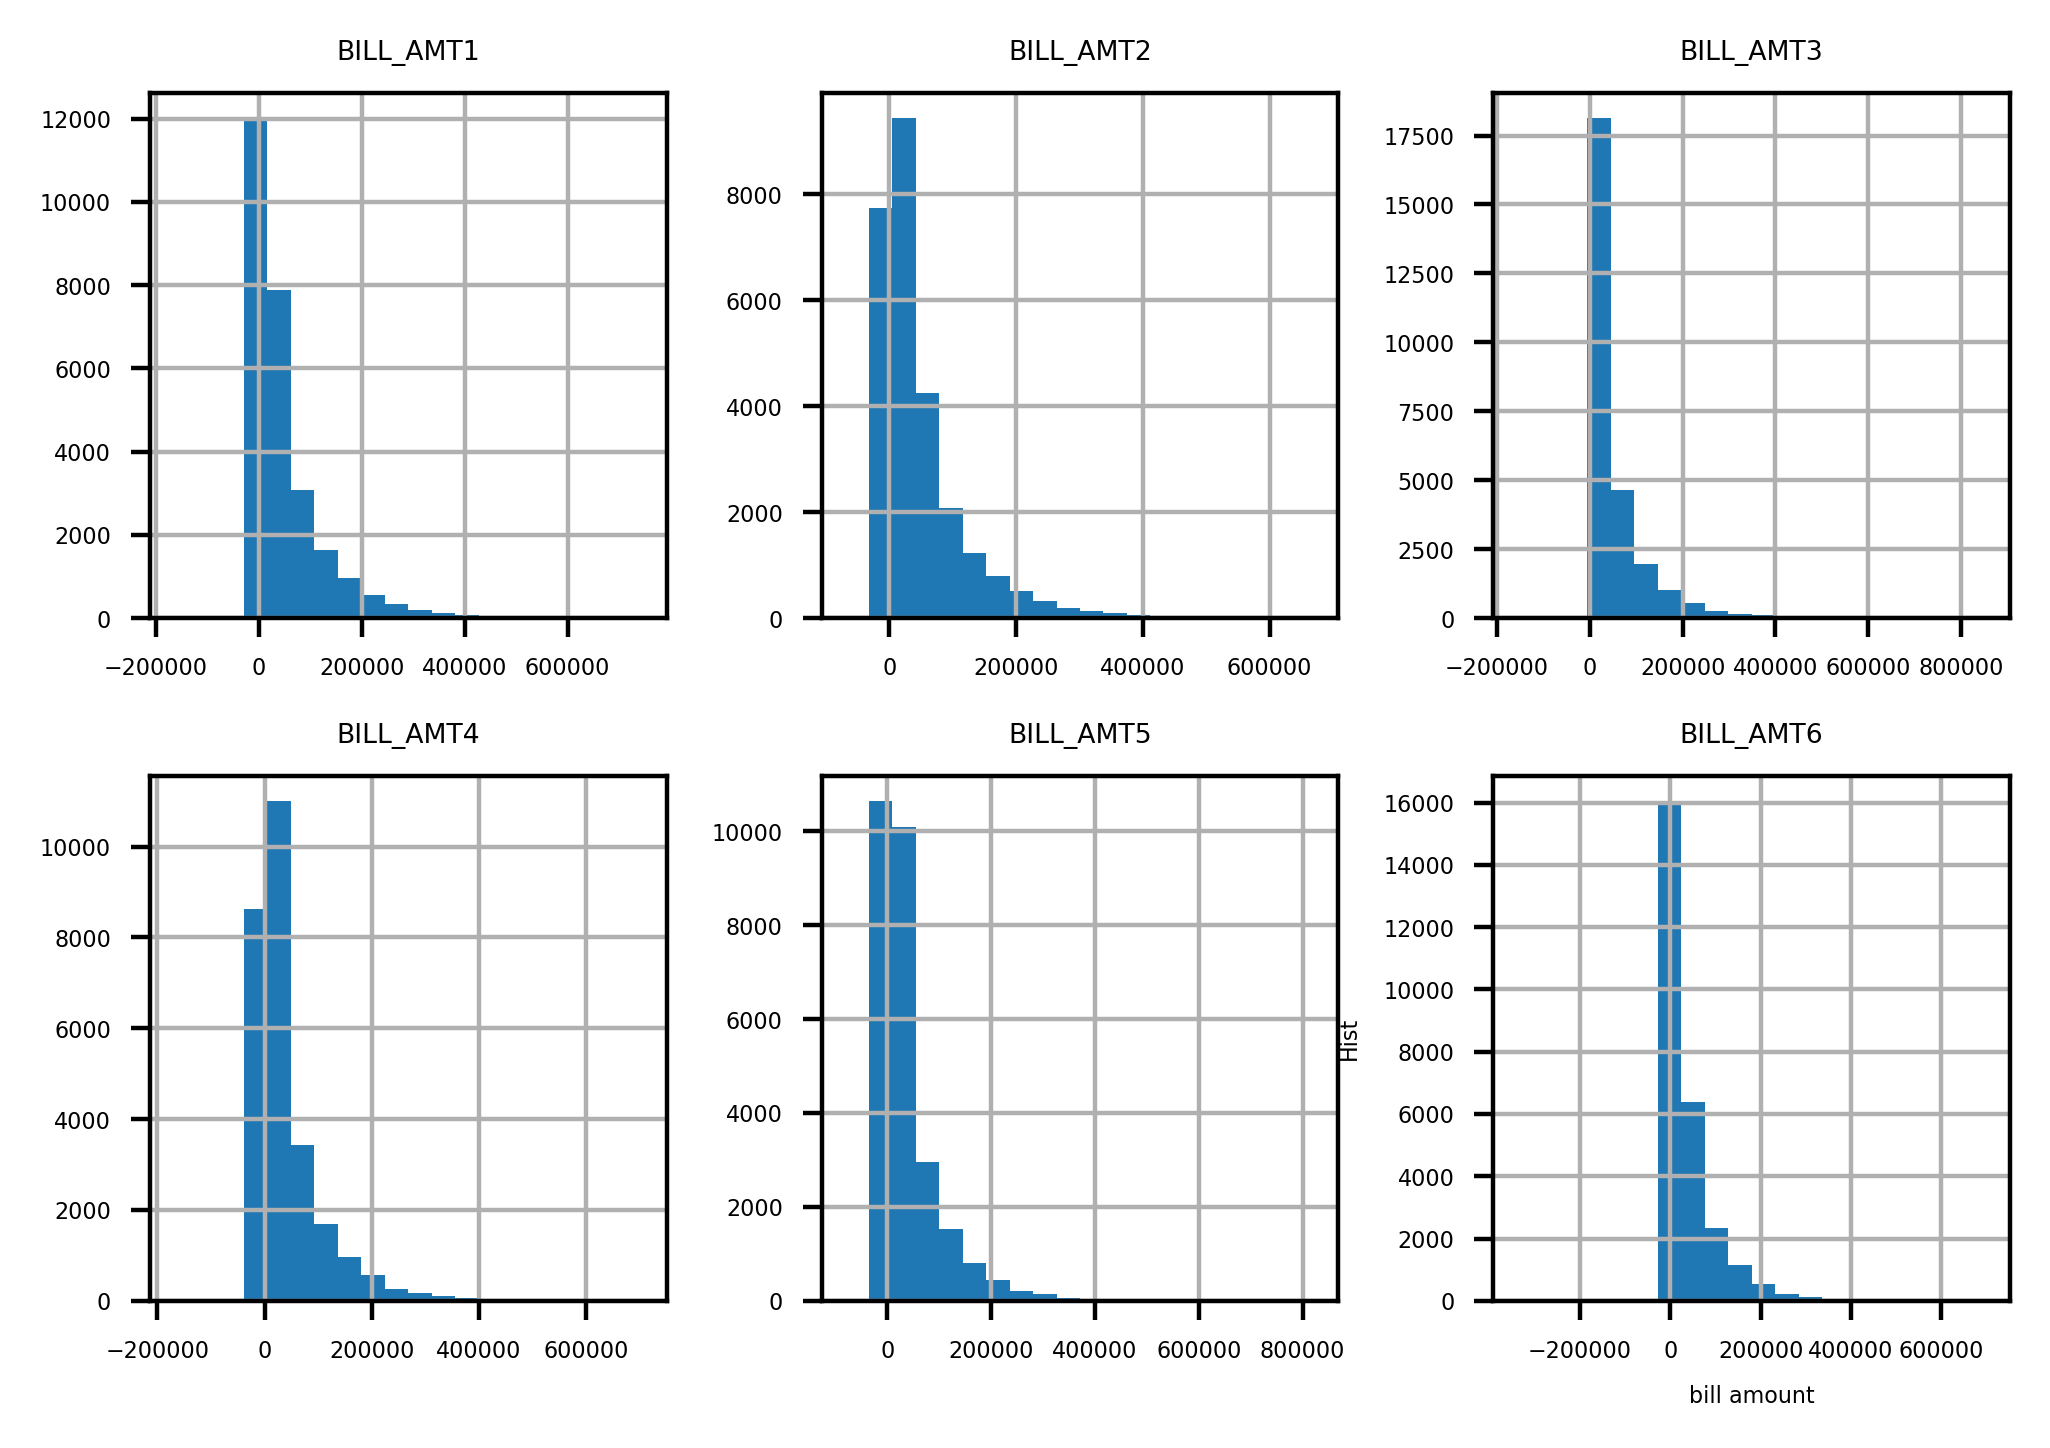

In [27]:
data[bill_feats].hist(bins=20,layout=(2,3))
plt.xlabel('bill amount')
plt.ylabel('Hist')

________________________________________________________________________
**Next, obtain the `.describe()` summary of the payment amount features.**


In [28]:
data[pay_amt_feats].describe()


,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000,26979.000000
mean,-0.017569,-0.131806,-0.165721,-0.222395,-0.266615,-0.290152
std,1.120173,1.191708,1.192280,1.161310,1.125481,1.143929
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


    Does this make sense?

_______________________________________________________________________________________
**Next, plot a histogram of the bill payment features similar to the bill amount features, 
but also apply some rotation to the x-axis labels with the `xrot` keyword argument 
so that they don't overlap. In any plotting function, you can include the `xrot=<angle>`
keyword argument to rotate x-axis labels by a given angle in degrees.**


Text(0.5, 0, 'pay amount')

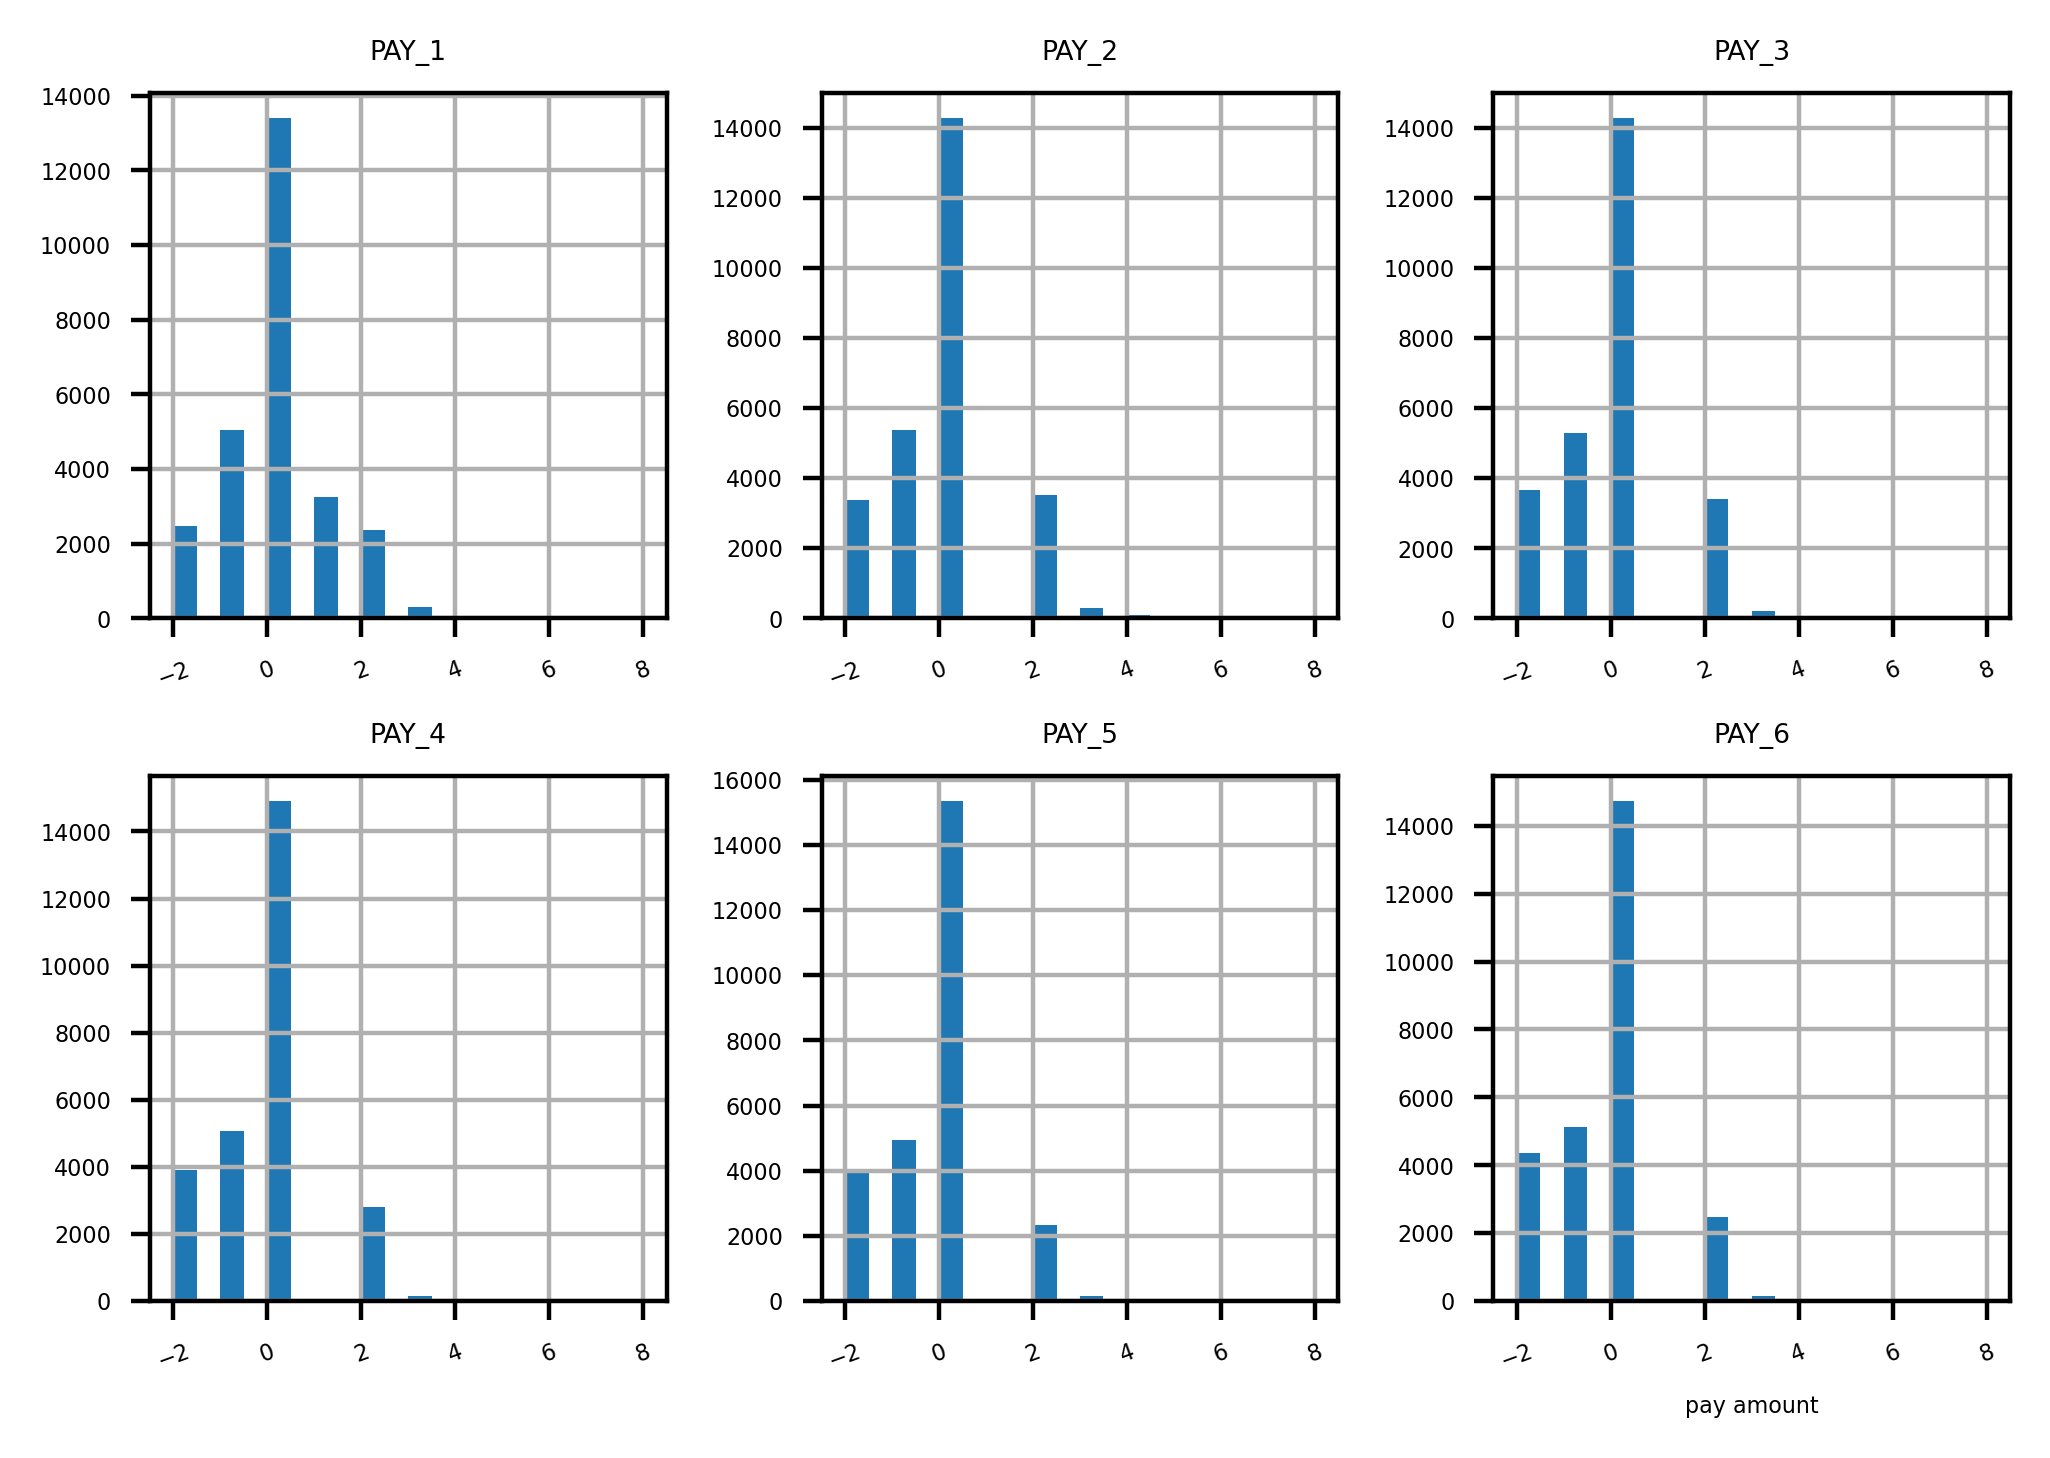

In [29]:
data[pay_amt_feats].hist(bins=20,layout=(2,3),xrot=20)
plt.xlabel('pay amount')

    Consider these results.

______________________________________________________________________________________________
**Then, use a Boolean mask to see how many of the payment amount data are exactly equal to 0. Review the results of the generated mask using `.head()` and `.sum()`.**



In [30]:
# Create Boolean mask
data_zero_mask=data[pay_amt_feats]==0

In [31]:
# Use `.head()`
data_zero_mask.head()


,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,False,False,False,False,False,False
1,False,False,True,True,True,False
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,False,True,False,True,True,True


In [32]:
# Use `.sum()`
data_zero_mask.sum()

PAY_1    13402
PAY_2    14276
PAY_3    14283
PAY_4    14911
PAY_5    15347
PAY_6    14731
dtype: int64

     Does this make sense given the histogram in the previous step?

_______________________________________________________________________________________________________________________________
**Finally, ignoring the payments of 0 using the mask you created in the previous step, use pandas `.apply()` and NumPy's `np.log10()` to plot histograms of logarithmic transformations of the non-zero payments.**
> Hint: You can use `.apply()` to apply any function, including `log10`, to all the elements of a DataFrame or a column using the following syntax: `.apply(<function_name>)`.

In [37]:
data_clean=data[pay_amt_feats]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A107CBBB48>,
      dtype=object)

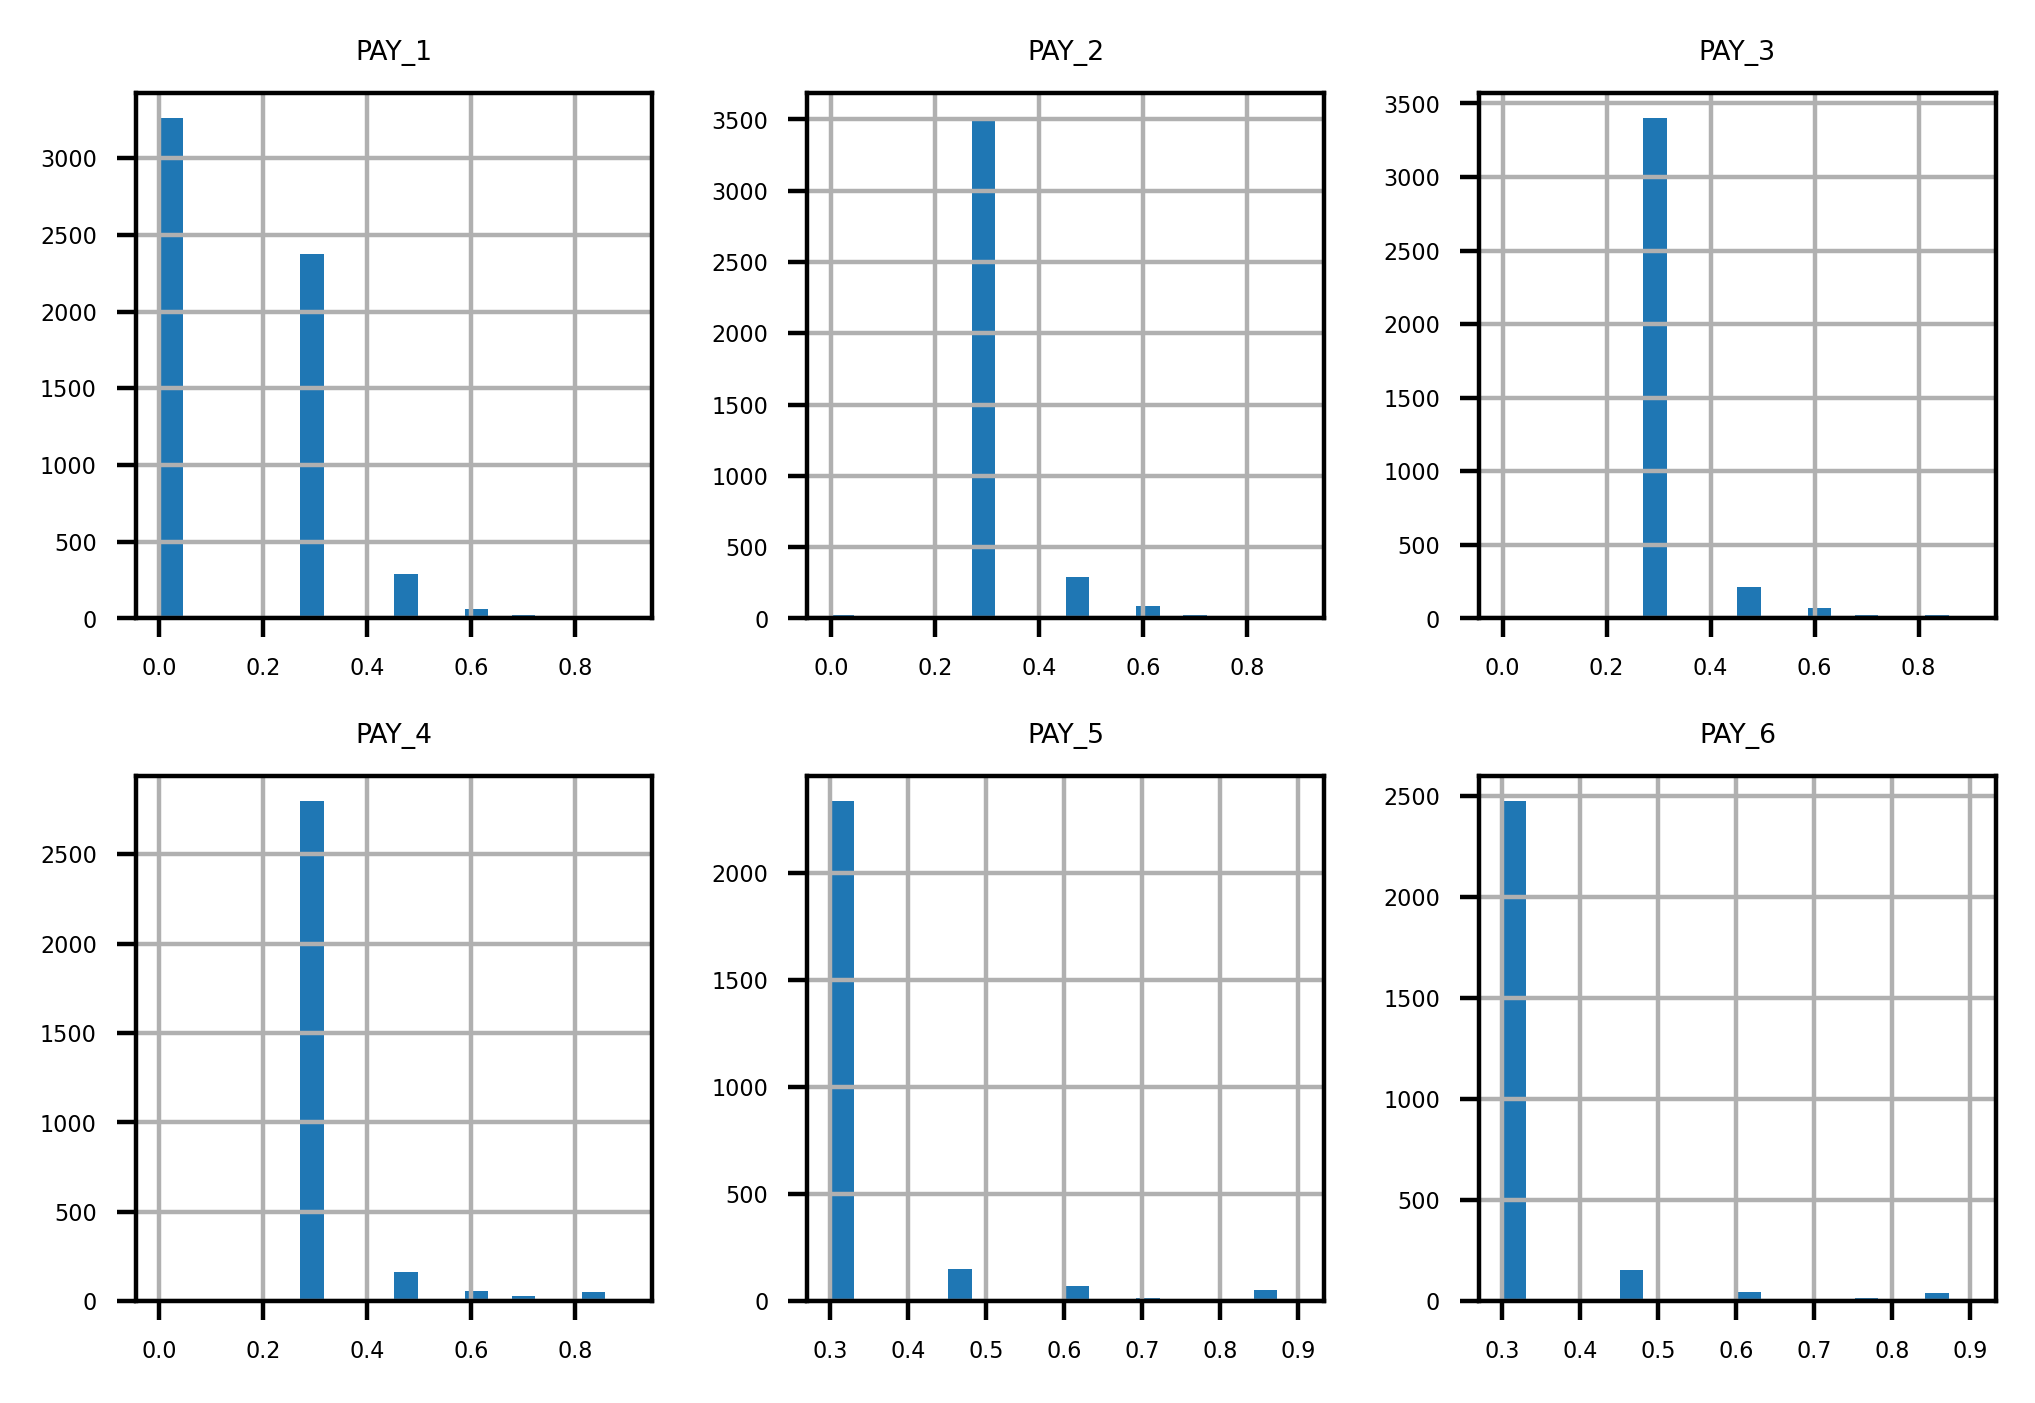

In [41]:
data_clean[~data_zero_mask].apply(np.log10).hist(bins=20,layout=(2,3))